# Autoencoding

## One-hot Encoder

In [1]:
from conx import *

Using Theano backend.


In [2]:
size = 5

In [3]:
net = Network("Autoencoder")
net.add(Layer("input", size, minmax=(0,1)))
net.add(Layer("hidden", 5, activation="relu", visible=True))
net.add(Layer("output", size, activation="sigmoid"))
net.config["font_family"] = "monospace"

In [4]:
net.connect()

In [5]:
net.compile(error='binary_crossentropy', optimizer="adam")

<IPython.core.display.Javascript object>

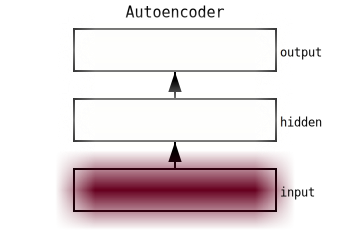

In [6]:
net

In [7]:
patterns = [one_hot(i, size) for i in range(size)]

In [8]:
patterns[0]

[1.0, 0.0, 0.0, 0.0, 0.0]

In [9]:
net.dataset.load([(p,p) for p in patterns])

<IPython.core.display.Javascript object>

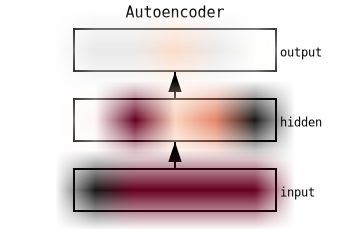

In [10]:
net

In [11]:
import time
for i in range(size):
    net.propagate(net.dataset.inputs[i])
    time.sleep(1)

In [12]:
net.dataset.summary()

Input Summary:
   count  : 5 (5 for training, 0 for testing)
   shape  : (5,)
   range  : (0.0, 1.0)
Target Summary:
   count  : 5 (5 for training, 0 for testing)
   shape  : (5,)
   range  : (0.0, 1.0)


In [13]:
net.train(accuracy=1, epochs=10000, report_rate=200, tolerance=0.4)

Training...
Epoch #  200 | train error 0.57405 | train accuracy 0.76000 | validate% 0.00000
Epoch #  400 | train error 0.43440 | train accuracy 0.84000 | validate% 0.20000
Epoch #  600 | train error 0.32174 | train accuracy 0.96000 | validate% 0.40000
Epoch #  800 | train error 0.22783 | train accuracy 0.96000 | validate% 0.80000
Epoch # 1000 | train error 0.16288 | train accuracy 0.96000 | validate% 0.80000
Epoch # 1200 | train error 0.12444 | train accuracy 0.96000 | validate% 0.80000
Epoch # 1400 | train error 0.09543 | train accuracy 1.00000 | validate% 0.80000
Epoch # 1560 | train error 0.07370 | train accuracy 1.00000 | validate% 1.00000


In [14]:
net.propagate(net.dataset.inputs[0])

[0.9354570508003235,
 0.009339133277535439,
 0.00015126794460229576,
 0.009521950036287308,
 0.012968219816684723]

In [15]:
net.test()

Testing on training dataset...
# | inputs | targets | outputs | result
---------------------------------------
0 | [1.00,0.00,0.00,0.00,0.00] | [1.00,0.00,0.00,0.00,0.00] | [0.94,0.01,0.00,0.01,0.01] | correct
1 | [0.00,1.00,0.00,0.00,0.00] | [0.00,1.00,0.00,0.00,0.00] | [0.01,0.91,0.00,0.04,0.01] | correct
2 | [0.00,0.00,1.00,0.00,0.00] | [0.00,0.00,1.00,0.00,0.00] | [0.02,0.02,0.92,0.03,0.03] | correct
3 | [0.00,0.00,0.00,1.00,0.00] | [0.00,0.00,0.00,1.00,0.00] | [0.14,0.33,0.13,0.60,0.03] | correct
4 | [0.00,0.00,0.00,0.00,1.00] | [0.00,0.00,0.00,0.00,1.00] | [0.05,0.03,0.04,0.00,0.95] | correct
Total count: 25
Total percentage correct: 0.84


In [16]:
for i in range(size):
    net.propagate(net.dataset.inputs[i])
    time.sleep(1)

In [17]:
net.dashboard()

<IPython.core.display.Javascript object>

Tab(children=(VBox(children=(HTML(value='<p style="text-align:center"><svg id=\'Autoencoder\' xmlns=\'http://www.w3.org/2000/svg\' width="350" height="235" image-rendering="pixelated">\n    <defs>\n        <marker id="arrow" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto" markerUnits="strokeWidth">\n          <path d="M0,0 L0,6 L9,3 z" fill="black" />\n        </marker>\n    </defs><text x="175.0" y="12.5" font-family="monospace" font-size="15" text-anchor="middle" alignment-baseline="central">Autoencoder</text><rect x="74.0" y="29" width="202" height="42" style="fill:none;stroke:black;stroke-width:2"/><image id="Autoencoder_output_7" class="Autoencoder_output" x="75.0" y="30" height="40" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhBQABAIcAAGoAHzw8PG8CIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAABQABAAAIBwADABgoICAAOw=="><title>Layer: output (output)\n shape = (5,)\n Keras class = Dense\n activation = sigmoid</title></image><text x="280.0" y="52.0" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">output</text><line x1="175.0" y1="99" x2="175.0" y2="72" stroke="black" stroke-width="2" marker-end="url(#arrow)"><title>Weights from hidden to output\n output/kernel has shape (5, 5)\n output/bias has shape (5,)</title></line><rect x="74.0" y="99" width="202" height="42" style="fill:none;stroke:black;stroke-width:2"/><image id="Autoencoder_hidden_8" class="Autoencoder_hidden" x="75.0" y="100" height="40" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhBQABAIcAAGcAHxoaGs7Ozu7u7gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAABQABAAAICAAHABAAIEBAADs="><title>Layer: hidden (hidden)\n shape = (5,)\n Keras class = Dense\n activation = relu</title></image><text x="280.0" y="122.0" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">hidden</text><line x1="175.0" y1="169" x2="175.0" y2="142" stroke="black" stroke-width="2" marker-end="url(#arrow)"><title>Weights from input to hidden\n hidd

## MNIST Autoencoding

In [18]:
from conx import Network, Layer, FlattenLayer

In [19]:
net = Network("MNIST-Autoencoder")

In [20]:
net.add(Layer("input", (28,28,1)))
net.add(FlattenLayer("flatten"))
net.add(Layer("hidden1", 25, activation="relu"))
net.add(Layer("hidden2", 25, activation="relu"))
net.add(Layer("hidden3", 25, activation="relu"))
net.add(Layer("output", (28,28,1), activation="sigmoid"))

<IPython.core.display.Javascript object>

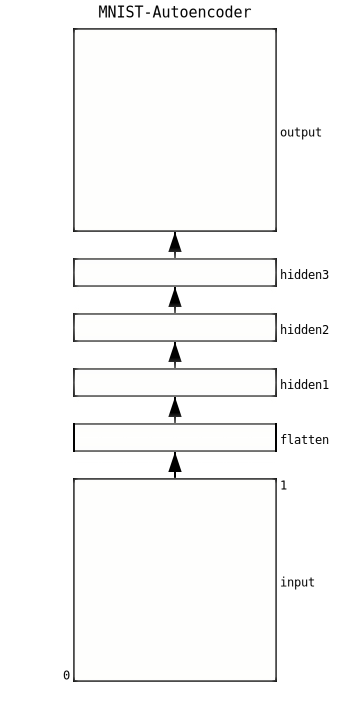

In [21]:
net.connect()
net.compile(error="binary_crossentropy", optimizer="adam")
net

In [22]:
net.dataset.get('mnist')
net.dataset.set_targets_from_inputs()
net.dataset.targets.reshape(0, (28 * 28))
net.dataset.summary()

Input Summary:
   count  : 70000 (70000 for training, 0 for testing)
   shape  : (28, 28, 1)
   range  : (0.0, 1.0)
Target Summary:
   count  : 70000 (70000 for training, 0 for testing)
   shape  : (784,)
   range  : (0.0, 1.0)


In [23]:
net.dashboard()

<IPython.core.display.Javascript object>

Tab(children=(VBox(children=(HTML(value='<p style="text-align:center"><svg id=\'MNIST-Autoencoder\' xmlns=\'http://www.w3.org/2000/svg\' width="350" height="705" image-rendering="pixelated">\n    <defs>\n        <marker id="arrow" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto" markerUnits="strokeWidth">\n          <path d="M0,0 L0,6 L9,3 z" fill="black" />\n        </marker>\n    </defs><text x="175.0" y="12.5" font-family="monospace" font-size="15" text-anchor="middle" alignment-baseline="central">MNIST-Autoencoder</text><rect x="74.0" y="29" width="202" height="202" style="fill:none;stroke:black;stroke-width:2"/><image id="MNIST-Autoencoder_output_7" class="MNIST-Autoencoder_output" x="75.0" y="30" height="200" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhHAAcAIcAAP38+wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAAHAAcAEAIMAABCBxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkwQDAgA7"><title>Layer: output (output)\n shape = (28, 28, 1)\n Keras class = Dense\n activation = sigmoid</title></image><text x="280.0" y="132.0" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">output</text><line x1="175.0" y1="259" x2="175.0" y2="232" stroke="black" stroke-width="2" marker-end="url(#arrow)"><title>Weights from hidden3 to output\n output/kernel has shape (25, 784)\n output/bias has shape (784,)</title></line><rect x="74.0" y="259" width="202" height="27" style="fill:none;stroke:black;stroke-width:2"/><image id="MNIST-Autoencoder_hidden3_8" class="MNIST-Autoencoder_hidden3" x="75.0" y="260" height="25" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhGQABAIcAAGcAH/nHrhoaGj09PX4HIpkQJ5mZmd5yW+qNcO6YePOjgP3gz/7t4wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAAGQABAAAIHwADKAAAgMAAAAIAMACwAAAABAACAABQwMABAAkABAQAOw=="><title>Layer: hidden3 (hidden)\n shape = (25,)\n Keras class = Dense\n activation = relu</title></image><text x="280.0" y="274.5" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">hidden3</text><

In [24]:
import numpy as np
from conx import get_form
image = np.random.rand(784).reshape((28, 28, 1))

In [25]:
get_form(net.propagate(image))

[[[numbers.Number, 1], 28], 28]

In [26]:
output = net.propagate_to_image("output", image)
output.size

(28, 28)

In [27]:
net.propagate_to("hidden3", image)

[0.06154844909906387,
 0.0,
 0.0,
 0.0,
 0.08922839164733887,
 0.1498868316411972,
 0.0,
 0.5282808542251587,
 0.050810132175683975,
 0.0,
 0.0,
 0.38388776779174805,
 0.0,
 0.0,
 0.21484920382499695,
 0.0,
 0.12499266117811203,
 0.0,
 0.0319090373814106,
 0.0,
 0.18090370297431946,
 0.12270572781562805,
 0.04858681187033653,
 0.5522233247756958,
 0.0]

In [28]:
net.dataset.slice(10)

In [30]:
net.train(accuracy=0.5, epochs=1000, report_rate=100, tolerance=.4)

Training...
Epoch #  100 | train error 0.17429 | train accuracy 0.81505 | validate% 0.00000
Epoch #  200 | train error 0.09077 | train accuracy 0.82526 | validate% 0.20000
Epoch #  228 | train error 0.07725 | train accuracy 0.82628 | validate% 0.50000


In [31]:
for i in range(10):
    net.propagate(net.dataset.inputs[i])

In [32]:
net.test()

Testing on training dataset...
# | inputs | targets | outputs | result
---------------------------------------
0 | [[[0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00]], [[0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00]], [[0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00]], [[0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],  [0.00],